# 데이콘 Basic Summer
## 쇼핑몰 지점별 매출액 예측 경진대회 

## 두번째 Baseline

안녕하세요 데이커 여러분!  
데이콘 Basic Summer에 오신 것을 환영합니다.

올해도 무더운 여름이 찾아왔습니다.  
하지만 여름이라고 하면 역시 Shopping 🛒을 빼놓을 순 없겠죠! 

<img src='https://user-images.githubusercontent.com/92353013/177723710-5b62e89f-f46b-4575-b356-f2899e288017.png' align=center>

데이콘과 함께, 초보부터 고수까지 모두가 참여하는 데이콘 Basic Summer   
**쇼핑몰 지점별 매출액 예측 경진대회**를 소개합니다.

쇼핑몰 매장별 프로모션 정보, 주변 날씨, 실업률, 연료 가격 등의 정보를 바탕으로  
쇼핑몰의 각 지점별 주간 매출액을 예측해주세요!

매출을 예측하는 간단한 대회 처럼 보이지만,   
데이터 분석을 처음 접하는 분들에게는 어디부터 시작해야 하는지 막막하실 겁니다.

데이콘이 준비한 베이스라인을 통해 데이터 분석에 입문해보세요!🥇

<p style='text-align: right;'> July, 2022 | All rights reserved by Dacon</p>

# I. 데이터 살펴보기

데이터 분석을 하기 위해 가장 먼저 해야할 일이 무엇일까요?

바로 데이터를 살펴보는 일입니다.  
주어진 데이터를 살펴보며 데이터의 모양과 대략적인 내용을 파악하고, 무슨 분석이 가능한지 확인하여 분석의 방향을 잡는 과정이 필요합니다.

대회 페이지의 [데이터] 탭에서 압축 파일을 다운받아 압축을 풀어주었다면 현재 폴더 구조는 아래와 같을 것입니다.

(현재 위치)  
- baseline.ipynb
- dataset (폴더)
  - train.csv
  - test.csv
  - sample_submission.csv

이번 대회의 데이터는 총 3가지이며 모두 csv 파일입니다.
1. train.csv : 데이터 분석 모델을 학습(train)하기 위해 사용하는 데이터
2. test.csv : 데이터 분석 모델을 통해 정답을 예측하기 위해 사용하는 데이터
3. sample_submission.csv : 예측한 정답 값을 기록하여 제출하기 위한 샘플 정답 파일

## 1. 데이터 준비

먼저 pandas 라이브러리의 `read_csv()` 함수를 이용해 분석에 사용할 데이터를 불러옵니다.

In [1]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('train.csv')

# test 데이터 불러오기
test = pd.read_csv('test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('sample_submission.csv')

## 2. 데이터 확인

이제 데이터가 어떻게 생겼는지 살펴봅시다.

In [2]:
# 잘 불러와졌는지 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


데이터 칼럼을 살펴보니 id, store, date 등 총 13 개의 칼럼이 있네요.
- id 칼럼은 각 행의 고유한 id를 나타냅니다. 총 6,255 개의 훈련용 데이터가 있네요.
- Store는 쇼핑몰 지점 정보입니다. 1에서 45 까지의 지점이 있는듯 합니다.
- Date는 주 단위(Weekly) 날짜입니다.2010년 2월 5일부터 2012년 9월 28일까지 있는 것 같네요.
- Temperature는 쇼핑몰 주변 기온입니다. 아무래도 화씨(F)로 표현된 것 같습니다.
- Fuel_Price는 쇼핑몰 주변 연료 가격입니다. 2년 사이에 1.6배나 올랐네요.
- Promotion은 쇼핑몰의 비식별화된 프로모션 정보입니다. 잘 모르겠지만 nan 값들이 많이 보이네요.
- Unemployment는 실업률 정보입니다. 아무래도 실업률이 높아지면 소비가 위축되지 않을까 싶네요.
- IsHoliday는 공휴일 정보입니다. 휴일이면 쇼핑하러 갈 시간이 더 많아지지 않을까요?
- Weekly_Sales는 주간 매출액으로 이번 대회의 목표 예측값입니다. 지점별로 차이가 큰 모습을 보이네요.

이번엔 `info()` 메소드를 이용해 데이터 결측치와 변수들의 타입을 확인해봅시다.

In [3]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


- Non-Null Count 부분을 보니 promotion 부분에 결측치가 있다는 것을 알 수 있습니다.  
특히 Promotion2는 4,000개 이상의 Nan값이 있네요.

- date, isholiday 부분은 숫자가 아니기 때문에 분석 전에 데이터 전처리가 필요하겠네요.

`describe()` 메소드를 이용해 Promotion 들을 좀 더 자세히 살펴봅시다.

In [4]:
# describe 메소드는 기초 통계량을 보여줍니다.
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


모든 Promotion 칼럼들은 공통적으로 많은 0 값을 가지고 있고,  
극단적인 수치를 가진 이상치들을 가지고 있다는 것을 알 수 있네요.

적절한 처리가 필요할 것 같습니다.

## 3. 데이터 시각화

간단하게 그래프를 그려 목표 예측값을 확인합니다.

지점별 주 단위 판매액을 살펴봅시다.

시각화를 위해 `matplotlib` 라이브러리를 사용합니다.

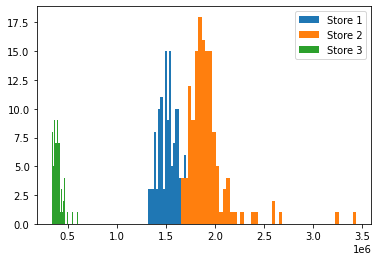

In [5]:
import matplotlib.pyplot as plt

# 이번엔 예측하고자 하는 값인 지점별 Weekly_Sales를 확인해봅니다.
plt.hist(train[train.Store==1].Weekly_Sales, bins=50)
plt.hist(train[train.Store==2].Weekly_Sales, bins=50)
plt.hist(train[train.Store==3].Weekly_Sales, bins=50)
plt.legend(['Store 1','Store 2','Store 3'])
plt.show()

각 지점별로 비교적 명확한 차이를 보이는 것을 확인할 수 있습니다.

이번 대회에서는 지점 정보가 큰 역할을 하겠네요.

## II. 데이터 전처리

데이터를 정확하게 분석하기 위해서는 먼저 데이터에 여러가지 처리를 해주어야 합니다.

데이터를 분석이 가능하도록 전처리 하는 과정, 데이터를 합치거나 나눠서 더 정확한 정보를 갖도록 하는 과정 등이 필요합니다.

### 1. 결측치(NA) 처리

결측치란 관측되지 않아 아무것도 없는 공간(Not Available)으로 되어있는 데이터입니다.

이 부분을 무엇인가로 채워주어야 분석을 진행할 수 있습니다.

이번 대회의 데이터는 Promotion1~Promotion5 의 5개 칼럼만 NA값을 갖고 있습니다.

Promotion은 비식별화된 데이터이기 때문에 자세한 분석은 어렵지만,  
추측해보자면 프로모션이 진행되지 않은 경우의 데이터를 NA으로 채워넣었다고 생각해볼 수 있습니다.

그렇다면 이런 경우 NA 값을 0 으로 치환해주는 것이 적절할 것입니다.

In [6]:
# pandas의 fillna(0) 메소드를 활용합니다.
train = train.fillna(0)
test=test.fillna(0)
# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


Promotion1~5 에 보이던 NA 값들이 0.00으로 채워진 것을 확인할 수 있습니다.

### 2. Date 전처리

Date 칼럼은 날짜 정보를 담고 있습니다.

날짜는 겉으로 보기엔 숫자로 이루어져 있는 것 같지만  
위의 출력 결과에서 볼 수 있다 시피 "31/08/2012" 형태의 문자로 이루어져 있습니다.

따라서 분석을 위해서는 "일/월/년도" 형식의 문자를 숫자로 변환해주어야 합니다.

년도, 월, 일 정보를 추출하여 사용하겠습니다.

In [7]:
# Date 칼럼에서 년도, 월, 일 정보를 숫자 형태로 반환하는 함수를 작성합니다.
def date_encoder(date):
    day, month, year = map(int, date.split('/'))
    return day, month, year

# 이 함수를 Date 칼럼에 적용하여 Day, Month, Year 칼럼을 생성합니다.
train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0])
train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])
test['Day'] = test['Date'].apply(lambda x: date_encoder(x)[0])
test['Month'] = test['Date'].apply(lambda x: date_encoder(x)[1])
test['Year'] = test['Date'].apply(lambda x: date_encoder(x)[2])

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012


In [8]:
# IsHoliday 칼럼의 값을 숫자 형태로 반환하는 함수를 작성합니다.
def holiday_to_number(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number

# 이 함수를 IsHoliday 칼럼에 적용한 NumberHoliday 칼럼을 만들어줍니다.
train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_number)
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_number)

"년도", "월", "일"에 대한 정보만을 담고 있는 칼럼들이 잘 생성된 것을 확인할 수 있습니다.

그런데 현재 데이터는 주간 데이터입니다.  
주간 데이터에서 일(Day)에 대한 데이터는 정보를 오염시킬 우려가 있습니다.

따라서 Day 칼럼은 제거해주겠습니다.

또한 전처리를 완료한 Date 칼럼도 제거하겠습니다.

In [9]:
# Day 칼럼을 제거합니다.
train = train.drop(columns=['id','IsHoliday', 'Date'])
test = test.drop(columns=['id','IsHoliday', 'Date'])

train

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
data = train.drop(columns=['Weekly_Sales']) # real train data
label = train[['Weekly_Sales']] # label

### 3. Promotion Scaling

위에서 확인한 것처럼 Promotion 칼럼들은 모두 이상치를 가지고 있습니다.

또한 각 Promotion 별 수치의 범위가 크게 차이가 나기 때문에 Scaling 을 통해 수치의 범위를 비슷하게 조정해주어야 합니다.

In [13]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, PowerTransformer, RobustScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from lightgbm import LGBMClassifier
import numpy as np

## scaling - 스케일링하지않은것, minmaxscaler, standarscaler 세가지중 score가 가장높은 것으로 선정
best_score = 0
columns = 'scaled_' + data.columns
for scaler in [PowerTransformer(), MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler()]: # scaling하는 방식 3가지
    scaled_train_x = data.copy()
    scaled_test_x = test.copy()
    scaled_train_x = scaler.fit_transform(data)
    scaled_test_x = scaler.transform(test)
    
    skf = StratifiedKFold(n_splits=3 , shuffle=True) # 교차검증 위한 선택
    main_model = LGBMClassifier(n_jobs = -1) # LGBMClassifier 모델선정
    scores = cross_val_score(main_model, scaled_train_x, label, scoring='accuracy', cv=skf, n_jobs=-1)
    
    scores1=cross_validate(main_model, scaled_train_x, label, cv=skf,return_train_score=True)
    print('cross_validate test_score: ',np.mean(scores1['test_score'])) 
    print('cross_validate train_score: ',np.mean(scores1['train_score']))

    print(f'TOTAL 최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')
    print('-'*30)

    if np.mean(scores) >= best_score:
        best_score = np.mean(scores)
        best_train_x = scaled_train_x
        best_test_x = scaled_test_x
        best_scaler = scaler

print('BEST SCALER : ', best_scaler.__class__.__name__)

final_train_x=best_train_x
final_test_x=best_test_x

[[-1.94266611e+00  3.93905384e-01  5.91744725e-01 ...  1.10530358e+00
   1.04583009e-13 -2.78423023e-01]
 [-1.94266611e+00  8.09581692e-02  5.56065751e-01 ...  1.10530358e+00
   1.04583009e-13 -2.78423023e-01]
 [-1.94266611e+00  3.60895893e-01  5.40465237e-01 ...  1.10530358e+00
   1.04583009e-13 -2.78423023e-01]
 ...
 [ 1.55416025e+00 -3.82716228e-01  1.45420083e+00 ...  1.10530358e+00
   1.04583009e-13 -2.78423023e-01]
 [ 1.55416025e+00 -2.75678663e-01  1.38380620e+00 ...  1.10530358e+00
   1.04583009e-13 -2.78423023e-01]
 [ 1.55416025e+00 -1.46836579e-01  1.18679208e+00 ...  1.10530358e+00
   1.04583009e-13 -2.78423023e-01]]


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

Scaling이 완료되었습니다.

이제 기존의 Promotion 칼럼들을 제거해줍시다.

In [14]:
# Promotion 칼럼들을 제거합니다.
train = train.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

train

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,8.106,False,1643690.90,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,38.51,2.548,8.106,True,1641957.44,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,39.93,2.514,8.106,False,1611968.17,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,46.63,2.561,8.106,False,1409727.59,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,46.50,2.625,8.106,False,1554806.68,3,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,8.684,False,734297.87,8,2012,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,6252,45,75.70,3.911,8.684,True,766512.66,9,2012,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,6253,45,67.87,3.948,8.684,False,702238.27,9,2012,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,6254,45,65.32,4.038,8.684,False,723086.20,9,2012,1.019698,-0.151556,-0.070589,0.360229,1.735591


성공적으로 전처리가 완료된 모습을 확인할 수 있습니다.

이제 같은 내용을 test set에도 적용해줍니다.

# III. Modeling

이제 전처리가 완료된 데이터를 사용하여 분석 모델을 학습시키고 예측 결과를 만들어보겠습니다.

## 1. 모델 선택

이번 시간에는 조금 더 복잡한 모델인 랜덤 포레스트 (Random Forest) 모델을 사용하여 분석을 진행하도록 하겠습니다.

### 랜덤 포레스트란?

<div align="center">
<img src="https://user-images.githubusercontent.com/49966189/179161260-c744f039-0223-43ec-aa4d-9ff270e682b8.png">
</div>
<div align="center">
<font color=gray> By Venkata Jagannath -
https://community.tibco.com/wiki/random-forest-template-tibco-spotfirer-wiki-page </font>
</div>

랜덤 포레스트는 대표적인 앙상블(ensemble) 모델의 일종입니다. "여러 개의 트리 모델" 에 "서로 다른 데이터"를 투입하여 나온 결과를 종합하여 가장 많은 투표(Voting)를 얻은 결과를 최종 결과로 선택하는 방식으로 작동합니다.

이를 통해 과적합(Overfitting)을 방지할 수 있고, 보다 일반화된 성능을 끌어낼 수 있습니다. 

랜덤 포레스트 모델은 `sklearn` 패키지를 이용해 간단하게 사용할 수 있습니다.

우선 설정한 **모델을 선언**해 주도록 해요.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
model = RandomForestRegressor()

## 2. 학습/예측 

이제 선안한 모델을 사용하여 학습과 예측을 진행하겠습니다.

학습이란 모델이 데이터를 바탕으로 데이터들 사이의 관계를 파악하는 과정입니다.

예측이란 학습을 통해 파악한 데이터 사이의 관계를 이용해 새로운 데이터에 대한 값을 추측하는 것입니다.

먼저 분석에 사용할 데이터들만 추려주도록 합니다.

In [17]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

이제 모델 학습을 시작합니다.

`sklearn`을 이용해 선언된 모델은 `fit()` 메소드를 이용해 간단하게 **모델을 학습** 시킬 수 있어요.

In [18]:
# 모델 학습
model.fit(x_train,y_train)

RandomForestRegressor()

모델 학습이 굉장히 간단하게, 또 빠르게 끝난 것을 확인할 수 있습니다.

다루는 데이터의 양이 많아지면 모델 학습이 오래 걸릴 수도 있어요!

이번엔 학습된 모델을 이용해 평가 데이터셋의 예측값을 구해봅시다.

`sklearn`을 이용해 선언된 모델은 **predict()** 메소드를 이용해 간단하게 **결과값을 예측**할 수 있어요.

In [19]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1612694.5835 1549672.9651 1500435.553  1471431.8964 1806221.2582
 1794021.5641 1711423.9336 1706480.8873  437444.3916  432876.8918]


# IV. 데이콘 제출하기


## 1. submission 파일 생성

이제 예측한 값을 **sample_submission.csv**에 넣어 제출용 파일을 생성해봅시다.

In [20]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,Weekly_Sales
0,1,1.612695e+06
1,2,1.549673e+06
2,3,1.500436e+06
3,4,1.471432e+06
4,5,1.806221e+06


In [21]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('random_forest_submission.csv',index = False)

## 2. 데이콘 페이지 제출
다음으로, 실제 데이콘 홈페이지에서 제출해보도록 하겠습니다.

이 과정을 통해 우리의 모델이 목표로 하는 데이터에 대해 어느 정도의 성능을 가지는지, 다른 사람들은 어느 정도의 성능을 얻었는지 확인할 수 있습니다.

<img src='https://user-images.githubusercontent.com/92353013/177723966-77b77340-c0f6-4873-95fc-9eb8c3812700.png'>

1. 먼저 대회 페이지에서 제출 탭의 버튼을 누르면 파일 업로드 화면으로 전환됩니다.

2. 전환된 화면에서 서류모양 아이콘을 클릭하여 제출할 파일을 선택하거나 파일을 마우스로 끌어와 서류모양 아이콘 위에 던져두면 파일을 업로드 할 수 있습니다.

3. 업로드가 완료되었다면 까만색 제출 버튼을 클릭합니다.

제출이 완료되었다면 [리더보드] 탭으로 이동하여 자신의 순위가 어디인지 확인해보세요!

그리고 자신만의 코드를 통해 어디까지 올라갈 수 있는지, 함꼐 해봐요! :]

# V. 마치며

<img src='https://user-images.githubusercontent.com/92353013/177723980-8d4c4662-9ba7-4834-9827-0b88824480fb.png'>

여러분은 방식으로 분석을 진행하셨나요?

이번 Baseline을 통해 어떤 방식으로 분석을 진행해야겠다는 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 분석을 진행하시고 코드공유에 올려주세요!

데이콘 스쿨 장학금, 스타벅스 기프티콘, 데이콘 굿즈 등 특별한 선물이 기다립니다!